# United States Macroeconomic Data Analysis using Python

This dataset contains month-wise details about all the macro-economic factors of US over two decades from 05/2002 to 05/2022 which can be used to determine how different factors affect a particular factor.

Sourced and compiled data from official websites of US government like FRED, CENSUS, OECD, Conference Board.

Collected economic data like Income, GDP, different indices, mortgage etc. from FRED official website, demographic data from OECD and consumer confidence Index from Conference Board.

Data obtained from : https://www.kaggle.com/datasets/sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices/data 

We will use this data to perform EDA and develop some predictive models and measure their performance. 

## Data Dictionary

* `UNRATE(%)` = Unemployment Rate 
* `CONSUMER CONF INDEX` = Consumer Confidence Index provided by Conference Board
* `PPI-CONST MAT.` = Producers Purchase Index - Construction Materials
* `CPIALLITEMS` = Consumer Price Index - All Items for the US
* `INFLATION(%)` = Inflation rate in the US
* `MORTGAGE INT. MONTHLY AVG(%)` = Average Mortgage interest rate of all Weeks of a particular month
* `MED HOUSEHOLD INCOME` = Median Household Income in the US
* `CORP. BOND YIELD(%)` = Corporate Bond Yield (%), the percentage Yield of corporate Bonds
* `MONTHLY HOME SUPPLY` = Indicates how long the current homes would last given no new homes
* `% SHARE OF WORKING POPULATION` = % Share of working population between the age 18 and 60
* `GDP PER CAPITA` = GDP per capita
* `QUARTERLY REAL GDP` = Quarterly Real GDP
* `QUARTERLY GDP GROWTH RATE (%)` = Quarterly GDP growth rate (%)
* `CSUSHPISA` = S&P/Case-Shiller U.S. National Home Price Index given by FRED

## Data Analysis

Let us start by importing the libraries we are going to use in our analysis.

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('US_Macroecon_data.csv')

In [3]:
df.describe()

UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
count  241.000000           241.000000      241.000000   241.000000   
mean     6.074689            90.809544      206.949863    95.539665   
std      1.987058            25.871004       40.479900    11.087025   
min      3.500000            25.000000      143.800000    75.859538   
25%      4.700000            70.400000      183.300000    87.722400   
50%      5.600000            94.500000      206.200000    96.819215   
75%      7.300000           108.200000      221.700000   103.255463   
max     14.700000           138.400000      352.857000   123.322800   

       INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
count    241.000000                    241.000000            224.000000   
mean       2.296497                      4.697956          53273.982143   
std        1.641645                      1.119850           7475.321506   
min       -2.097161                      2.684000          42409.000000   
25%        1.463784                      3.802500          49007.250000   
50%        2.070508                      4.457500          50303.000000   
75%        2.969762                      5.812500          59039.000000   
max        8.581511                      6.806000          68703.000000   

       CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  \
count           241.000000           241.000000   
mean              4.471162             5.974274   
std               1.079004             1.895763   
min               2.140000             3.300000   
25%               3.690000             4.600000   
50%               4.340000             5.500000   
75%               5.410000             6.700000   
max               6.750000            12.200000   

       % SHARE OF WORKING POPULATION  GDP PER CAPITA  QUARTERLY REAL GDP  \
count                     236.000000      241.000000          241.000000   
mean                       66.410104    52896.082988        16536.012095   
std                         0.802918     8840.592318         1708.435162   
min                        64.924129    37860.000000        13477.356000   
25%                        65.623251    46977.000000        15304.517000   
50%                        66.739214    51554.000000        16253.726000   
75%                        67.128435    58745.000000        17896.623000   
max                        67.298433    74737.000000        19806.290000   

       QUARTERLY GDP GROWTH RATE (%)   CSUSHPISA  
count                     241.000000  241.000000  
mean                        0.490060  175.306996  
std                         1.453910   36.780758  
min                        -8.937251  120.724000  
25%                         0.293599  147.395000  
50%                         0.580001  169.812000  
75%                         0.833911  189.707000  
max                         7.547535  304.831000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           241 non-null    object 
 1   UNRATE(%)                      241 non-null    float64
 2   CONSUMER CONF INDEX            241 non-null    float64
 3   PPI-CONST MAT.                 241 non-null    float64
 4   CPIALLITEMS                    241 non-null    float64
 5   INFLATION(%)                   241 non-null    float64
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64
 7   MED HOUSEHOLD INCOME           224 non-null    float64
 8   CORP. BOND YIELD(%)            241 non-null    float64
 9   MONTHLY HOME SUPPLY            241 non-null    float64
 10  % SHARE OF WORKING POPULATION  236 non-null    float64
 11  GDP PER CAPITA                 241 non-null    int64  
 12  QUARTERLY REAL GDP             241 non-null    flo

In [4]:
#df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           241 non-null    datetime64[ns]
 1   UNRATE(%)                      241 non-null    float64       
 2   CONSUMER CONF INDEX            241 non-null    float64       
 3   PPI-CONST MAT.                 241 non-null    float64       
 4   CPIALLITEMS                    241 non-null    float64       
 5   INFLATION(%)                   241 non-null    float64       
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64       
 7   MED HOUSEHOLD INCOME           224 non-null    float64       
 8   CORP. BOND YIELD(%)            241 non-null    float64       
 9   MONTHLY HOME SUPPLY            241 non-null    float64       
 10  % SHARE OF WORKING POPULATION  236 non-null    float64       
 11  GDP PER CAPITA     

FIG.1 UNRATE(%) over time.


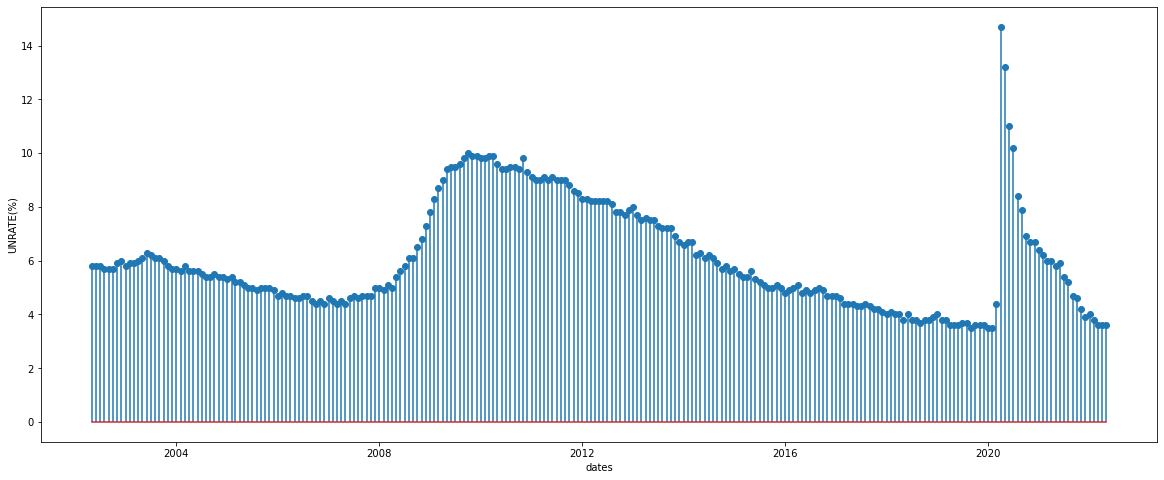

FIG.2 CONSUMER CONF INDEX over time.


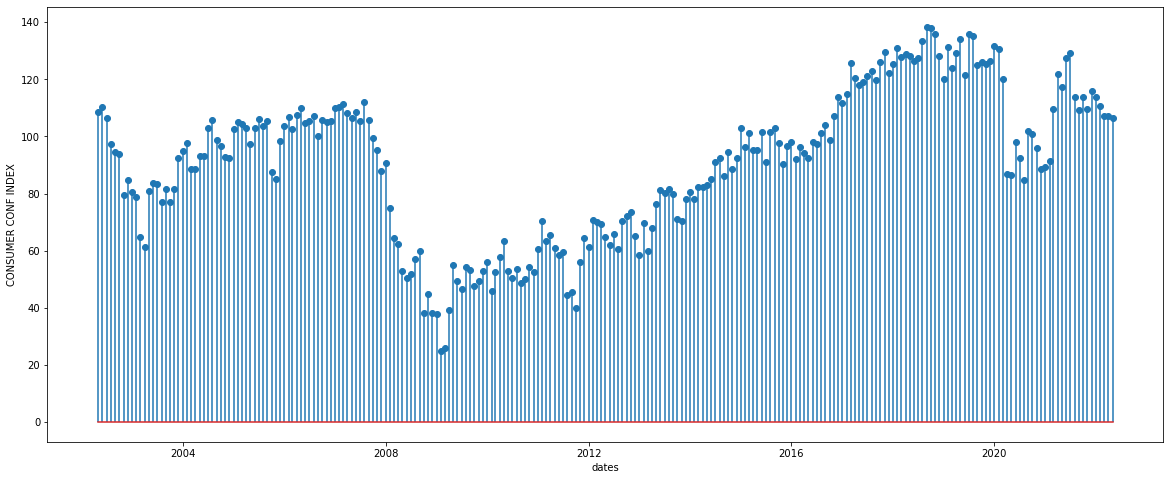

FIG.3 PPI-CONST MAT. over time.


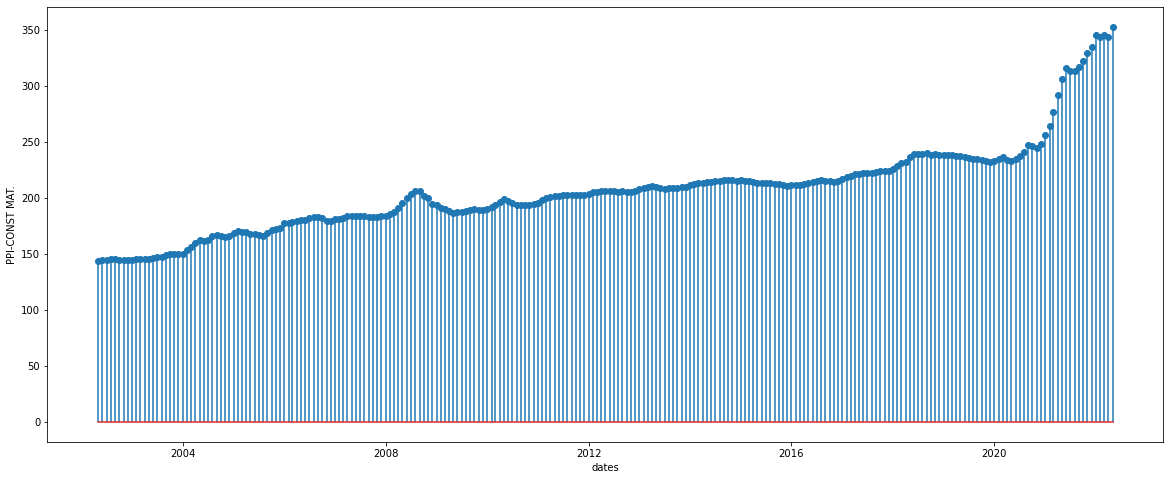

FIG.4 CPIALLITEMS over time.


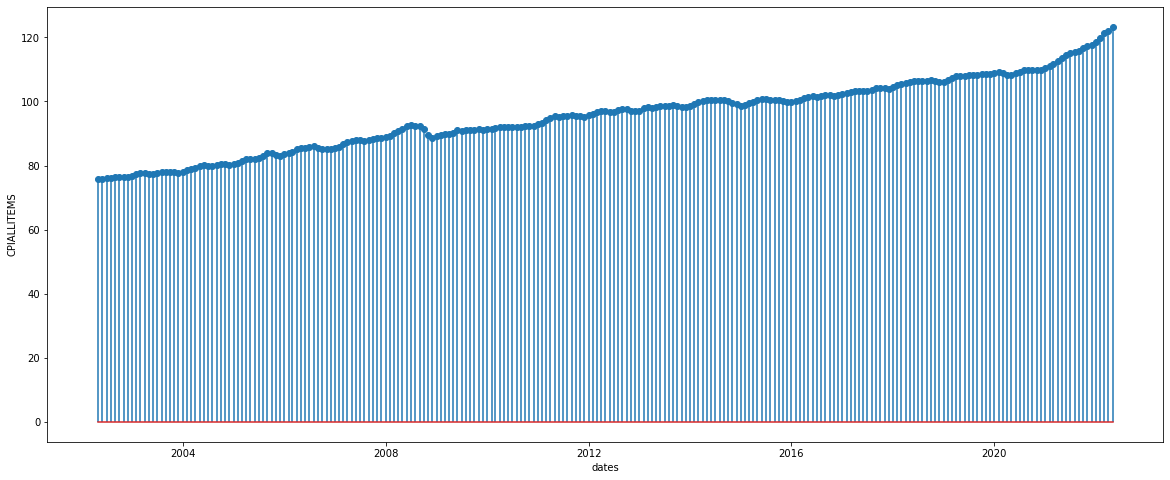

FIG.5 INFLATION(%) over time.


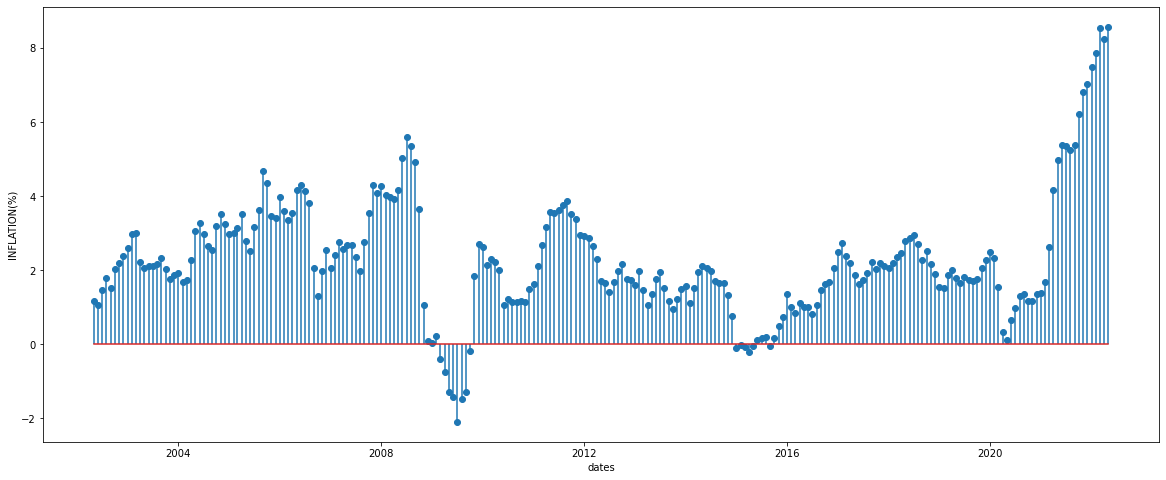

FIG.6 MORTGAGE INT. MONTHLY AVG(%) over time.


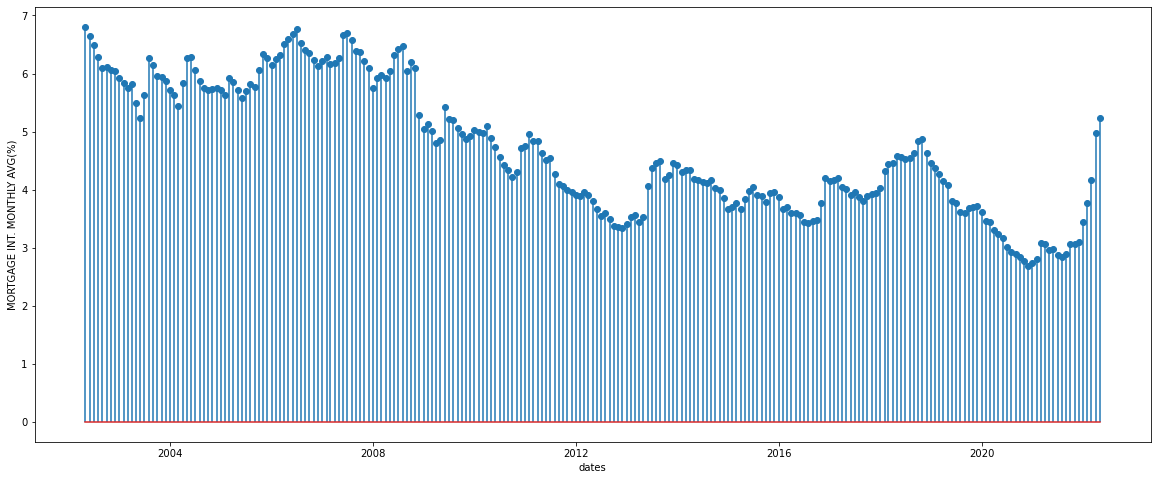

FIG.7 MED HOUSEHOLD INCOME over time.


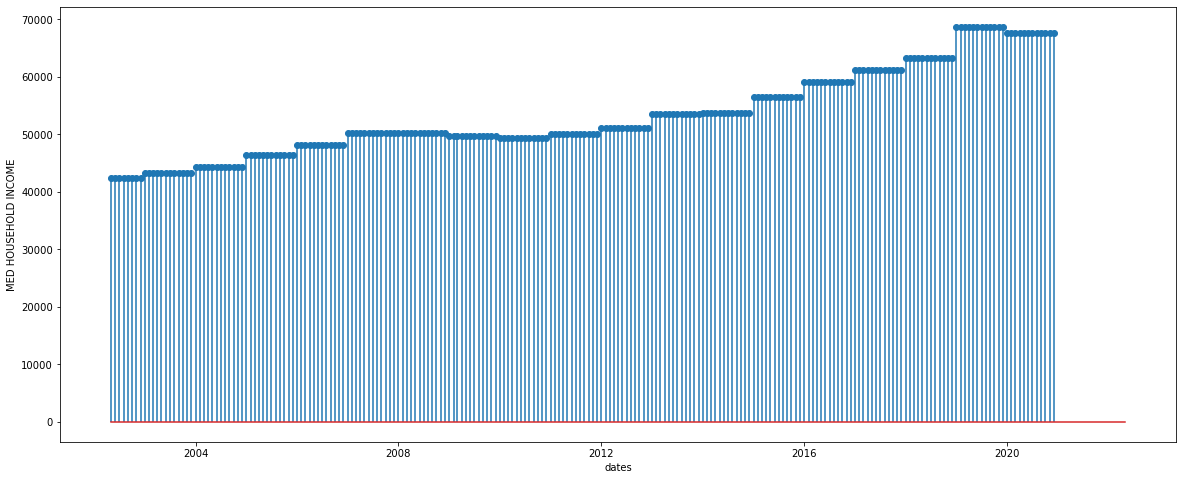

FIG.8 CORP. BOND YIELD(%) over time.


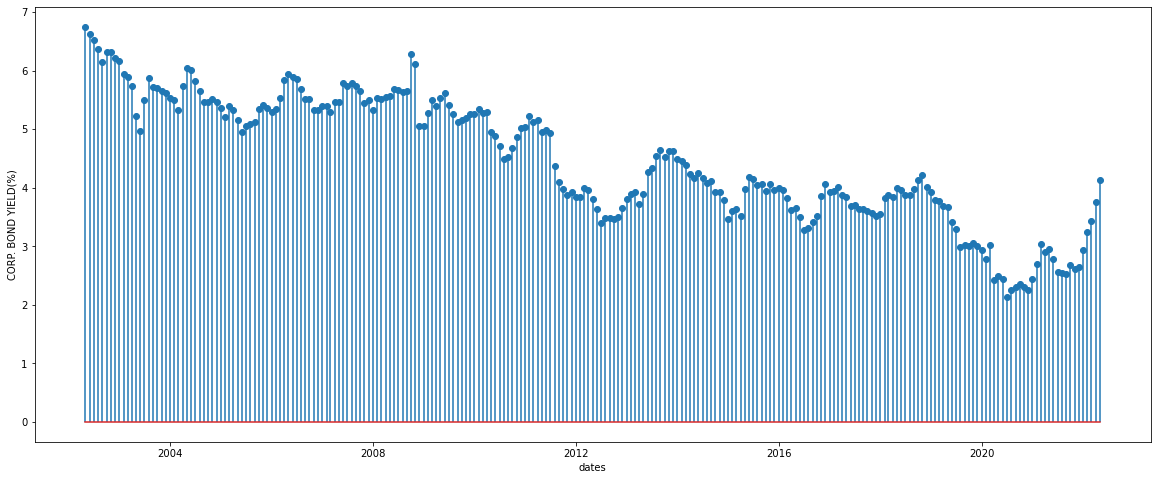

FIG.9 MONTHLY HOME SUPPLY over time.


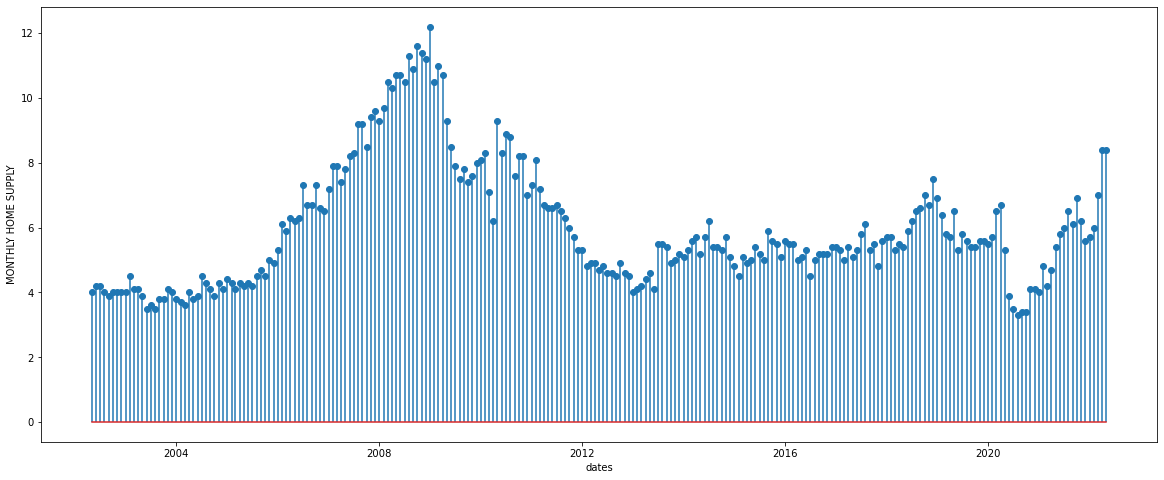

FIG.10 % SHARE OF WORKING POPULATION over time.


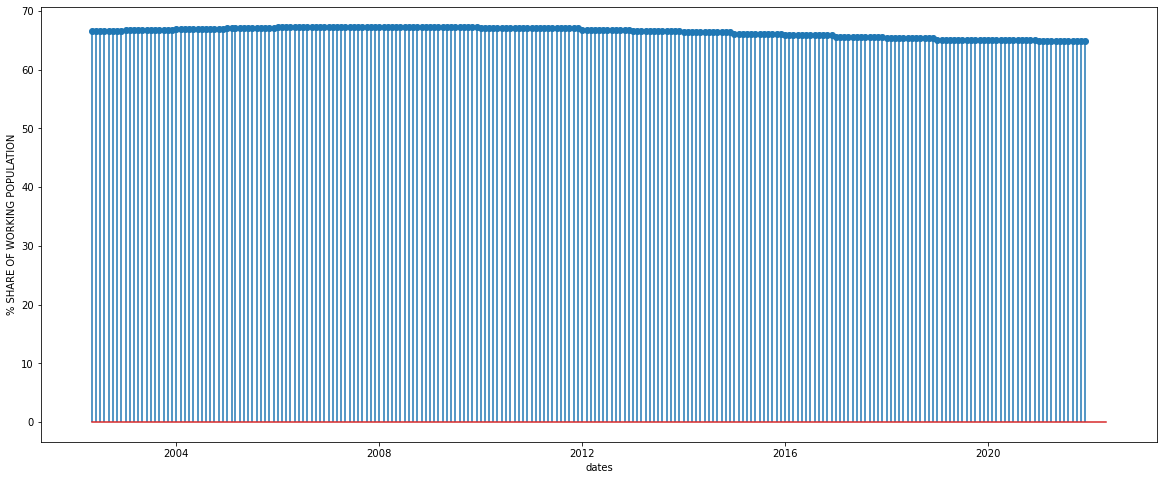

FIG.11 GDP PER CAPITA over time.


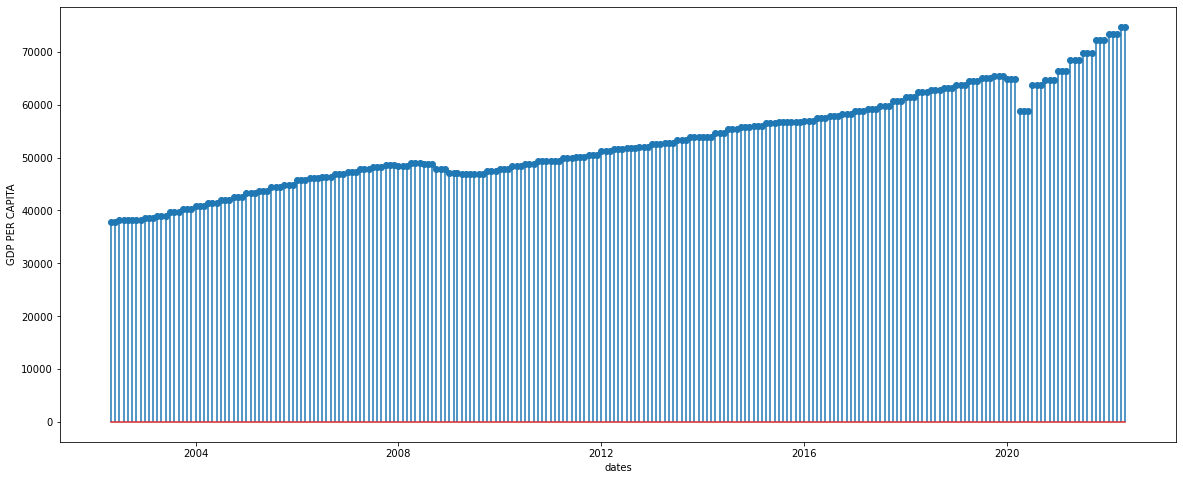

FIG.12 QUARTERLY REAL GDP over time.


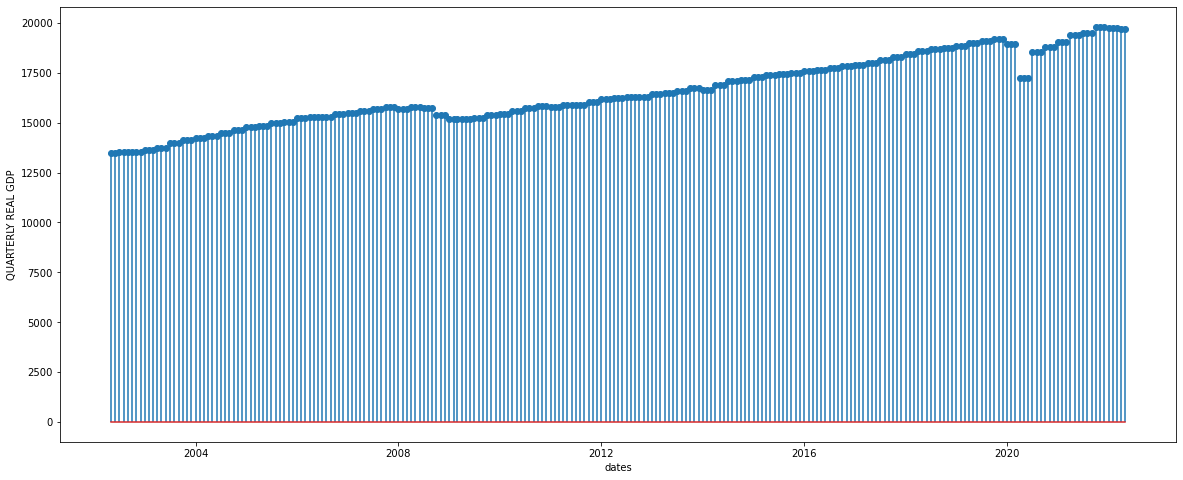

FIG.13 QUARTERLY GDP GROWTH RATE (%) over time.


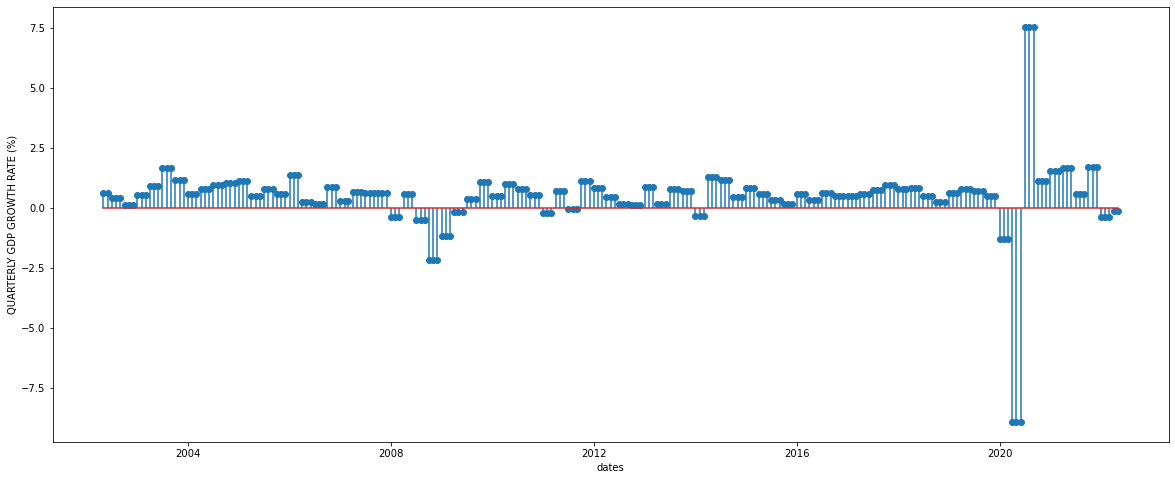

FIG.14 CSUSHPISA over time.


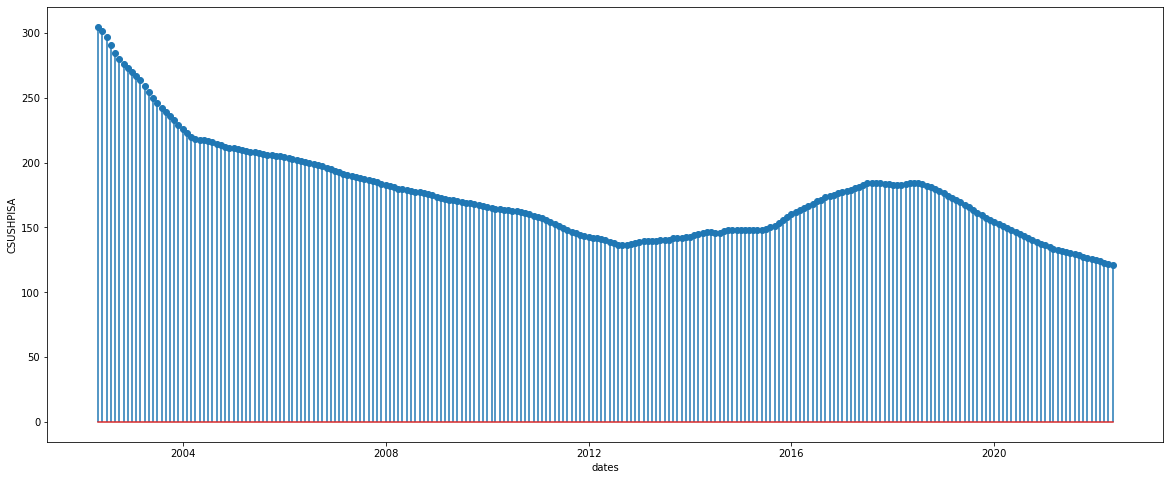

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline


datearray = df['DATE'].apply(lambda x: np.datetime64(x[6:]+'-'+x[3:5]))

i=1
# we iterate through all values and graph them
for column in df.columns:
    # there's no sense in graphing dates to dates
    if column == 'DATE':
        continue
        
    print("FIG."+str(i)+" "+column+" over time.")
    i += 1
    
    # defining x and y axis
    x_axis = (datearray)
    y_axis = df[column]

    # plotting the figure
    plt.rcParams["figure.figsize"] = (20,8)
    plt.xlabel("dates")
    plt.ylabel(column)
    ax = plt.subplot()
    ax.stem( x_axis, y_axis)
    ax.xaxis_date()
    plt.show()

We observe several notable trends in our data:

* Changes in the inflation rate and mortgage interest rate appear to mirror each other, indicating a strong positive correlation.
* The unemployment rate experienced a significant spike in 2020, likely due to the COVID-19 pandemic.
* Both the inflation rate and mortgage interest rate showed substantial increases as the unemployment rate began to decline following its 2020 peak, suggesting a relationship among these three variables.
* The 2008 housing crisis impacted employment trends differently compared to the COVID-19 pandemic. While the 2020 spike was abrupt and volatile, the 2008 crisis exhibited a more gradual exponential rise.
* Both inflation and GDP growth rates displayed marked volatility in response to the economic shocks of 2008 and 2020.

Let us view the attributes plotted next to each other.

In [8]:
df = pd.read_csv('US_Macroecon_data.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

Ndf = pd.DataFrame()
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        Ndf[column] = df[column]
Ndf['DATE'] = df['DATE']
Ndf['NDATE'] = Ndf['DATE'].dt.strftime('%m-%Y')
Ndf = Ndf.groupby(by=['NDATE']).mean().reset_index()

nrows = 7 
ncols = 2

cols = Ndf.columns[1:]
                                                     
fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols)

for index,col in enumerate(cols):
    fig.add_trace(go.Scatter(x=Ndf['NDATE'], y=Ndf[col],mode='markers', 
                            hovertemplate="<br>".join(["Date: %{x}",
                                                       "Value: %{y}",
                                                       ])),      
                  row=index//ncols+1, col=(index%ncols)+1)
    
fig.update_layout(height=1700, title_text="Metrics over Time",showlegend=False)
fig.update_xaxes(tickangle=45)

fig.show()

Over the past two decades, CPIALLITEMS, median household income, GDP per capita, and quarterly real GDP have shown a steady upward trend. Conversely, the percentage share of the working population, corporate bond yields, the monthly average mortgage interest rate, and CSUSHPISA have generally been on a downward trajectory. Meanwhile, quarterly GDP growth rate, inflation, and consumer confidence have exhibited fluctuations over the same period.

Let us now take a look at the measure of volatility between the different metrics. Some measures change rapidly while others are more gradual.

In [9]:
std = pd.Series(data=[Ndf[col].std()/Ndf[col].mean() for col in Ndf.columns[1:]],index=Ndf.columns[1:])
std = std.apply(lambda x : round(x,3))

fig = go.Figure(data=[go.Table(
    header=dict(values=['Metric','Volatility'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[std.index,std.values],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Levels of Volatility')
fig.show()

The quartrly GDP growth rate has the highest level of volatility and inflation being a somewhat close second. Quarterly GDP is differentiated as it's a rate and not a measurement like the other metrics. 

Let us plot Inflation and Quarterly GDP to see how they're changing


In [10]:
pct_change = Ndf.copy()
pct_change.set_index('NDATE',inplace=True)
pct_change = pct_change.pct_change()
for col in pct_change.columns:
    newcol = col+' pct_change'
    pct_change = pct_change.rename(columns={col:col+' pct_change'})
    pct_change[newcol] = pct_change[newcol].map('{:.0%}'.format)
    
combined = Ndf.join(pct_change,how='left',on='NDATE')

nrows = 2 
ncols = 1

cols = ['INFLATION(%)','QUARTERLY GDP GROWTH RATE (%)']
                                                     
fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols)

position = 0
for index,col in enumerate(cols):
    
    row = position//ncols+1
    column = (position%ncols)+1
    
    fig.add_trace(go.Scatter(x=Ndf['NDATE'], y=combined[col],mode='markers',
                            customdata = combined[col+' pct_change'],
                            hovertemplate="<br>".join(["Date: %{x}",
                                                       "Value: %{y}",
                                                       "Fraction Change: %{customdata}"
                                                       ])),      
                  row=row, col=column)
    position += 1
    
fig.update_layout(height=800, title_text="Metrics Positively Related with GDP",showlegend=False)
fig.update_xaxes(tickangle=45)

fig.show()

Inflation has surged significantly over the past year or two following COVID, with no signs of slowing down in the current data. Hopefully, the numbers for the coming years will show a decrease. The GDP growth rate has been highly volatile, with three years of negative growth in the past two decades. Notably, 2019 experienced a significant decline in GDP, followed by a period of strong growth in 2020, and another decline in 2021. Based on this data alone, trends for 2022 remain unpredictable.

The consumer price index for all items had a relatively low level of volatility. This will likely be a good measure to predict with linear regression. Let us do that later in the notebook.

## Measure of Volatility

Lets create a correlation matrix to get a high level view of the relationship between metrics so that they can be analyzed furthur.

<AxesSubplot:>

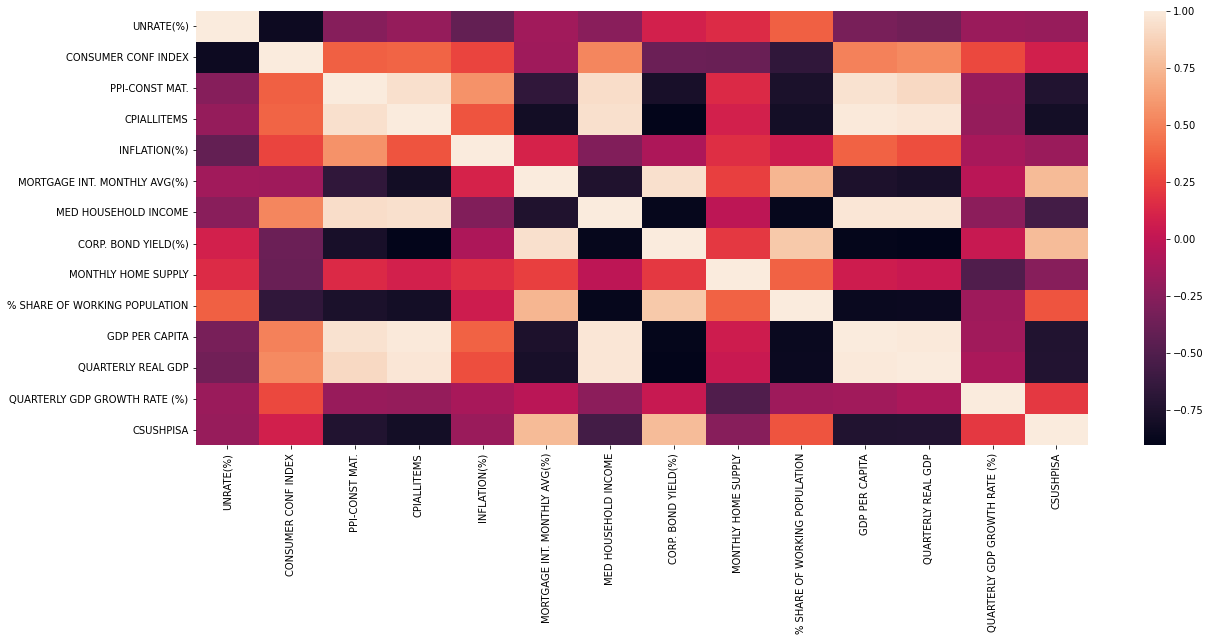

In [11]:
corrMatrix = Ndf.corr()
sns.heatmap(corrMatrix)

In [12]:
topcorr = corrMatrix['GDP PER CAPITA'].sort_values(ascending=False)[1:]
topcorr = topcorr.to_frame()

topcorr['GDP PER CAPITA'] = topcorr['GDP PER CAPITA'].map('{:,.3f}'.format)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Metric','Correlation with GDP'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[topcorr.index,topcorr.values],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='GDP Correlations')
fig.show()

The table reports that Quarterly Real GDP, CPIALLITEMS, Median Household Income, and PPI-Const Mat. are very postively correlated while Mortgage interest monthly average, % share of working population, and corporate bond yield are negatively related to GDP.

## GDP per capita
It's noted that one of the most comprehensive ways of measuring a country's economic health is its GDP. Above is a table showing the correlations of other metrics in the dataset with respect it. 

Let us plot seperate visualizations to view the metrics positively and negatively correlated with GDP.


In [13]:
pct_change = Ndf.copy()
pct_change.set_index('NDATE',inplace=True)
pct_change = pct_change.pct_change()
for col in pct_change.columns:
    newcol = col+' pct_change'
    pct_change = pct_change.rename(columns={col:col+' pct_change'})
    pct_change[newcol] = pct_change[newcol].map('{:.0%}'.format)
    
combined = Ndf.join(pct_change,how='left',on='NDATE')

In [14]:
nrows = 3 
ncols = 2

cols = ['GDP PER CAPITA','CPIALLITEMS','MED HOUSEHOLD INCOME','PPI-CONST MAT.']
                                                     
fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols,specs=[[{"colspan": 2}, None],[{}, {}],
           [{"colspan": 2}, None]],)

position = 0
for index,col in enumerate(cols):
    
    row = position//ncols+1
    column = (position%ncols)+1

    if row == 1 and column == 2:
        position += 1
        row = position//ncols+1
        column = (position%ncols)+1
    
    fig.add_trace(go.Scatter(x=combined['NDATE'], y=combined[col],mode='markers',
                            customdata = combined[col+' pct_change'],
                            hovertemplate="<br>".join(["Date: %{x}",
                                                       "Value: %{y}",
                                                       "Fraction Change: %{customdata}"
                                                       ])),      
                  row=row, col=column)
    position += 1
    
fig.update_layout(height=800, width=800, title_text="Metrics Positively Related with GDP",showlegend=False)
fig.update_xaxes(tickangle=45)

fig.show()

The graphs above display metrics positively correlated with GDP, including CPIALLITEMS, median household income, and PPI-CONST MAT. These metrics have generally trended upward, and you can hover over the data points to observe year-over-year changes. The relatively linear growth suggests these metrics represent more stable aspects of the economy. However, around 2020, all these indicators show notable volatility, almost certainly driven by the impact of COVID-19. Given this disruption, a linear model may not be suitable for predicting trends for 2023.

In [15]:
nrows = 3 
ncols = 2


cols = ['GDP PER CAPITA','CORP. BOND YIELD(%)','% SHARE OF WORKING POPULATION',
        'MORTGAGE INT. MONTHLY AVG(%)']
                                                     
fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols,specs=[[{"colspan": 2}, None],[{}, {}],
           [{"colspan": 2}, None]],)

position = 0
for index,col in enumerate(cols):
    
    row = position//ncols+1
    column = (position%ncols)+1

    if row == 1 and column == 2:
        position += 1
        row = position//ncols+1
        column = (position%ncols)+1
    
    fig.add_trace(go.Scatter(x=combined['NDATE'], y=combined[col],mode='markers',
                            customdata = combined[col+' pct_change'],
                            hovertemplate="<br>".join(["Date: %{x}",
                                                       "Value: %{y}",
                                                       "Fraction Change: %{customdata}"
                                                       ])),      
                  row=row, col=column)
    position += 1
    
fig.update_layout(height=800, title_text="Metrics Negatively Related with GDP",showlegend=False)
fig.update_xaxes(tickangle=45)

fig.show()

The graphs above illustrate metrics negatively correlated with GDP. The percentage of the working population saw a slight increase before beginning a steady decline after 2008, with COVID appearing to slow this trend. Corporate bond yields have generally decreased over the past two decades but experienced a sharp rise around 2021–2022. Similarly, the monthly average mortgage rates closely followed this pattern, with declines over time and a significant uptick around 2022.

## Highly Correlated Metrics

In [17]:
def createFig(df,x,columns=Ndf.columns.values,title='US Economic Metrics Over Time'):
    fig = px.line(df,x,y=columns,title = title)
    fig.update_xaxes(title='Date')
    fig.update_yaxes(title='Value')
    fig.update_layout(legend=dict(title='Metrics'))
    fig.show()

N2df = pd.DataFrame()
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        N2df[column] = df[column]/df[column].max()
N2df['DATE'] = df['DATE']
N2df['NDATE'] = N2df['DATE'].dt.strftime('%m-%Y')
N2df = N2df.groupby(by=['NDATE']).mean().reset_index()

createFig(N2df,'NDATE',['MED HOUSEHOLD INCOME','GDP PER CAPITA'],
         title = 'High Postive Correlated Metrics')

The Consumer Price Index of all items, Producer Price Index of construction materials, Median household income, and GDP per capita are all highly correlated, with a significant spike in the price of construction materials around 2020. It may be the case that this spike will cause a ripple effect in other metrics in the future.

## Negatively Correlated Metrics

In [18]:
createFig(Ndf,'NDATE',['CONSUMER CONF INDEX','PPI-CONST MAT.'],
         title = 'High Negative Correlated Matrices')

A negative correlations was logged in the plot, however, there doesn't appear to be a solid relationship between the two. Consumer Confidence significantly dropped in 2009, very likely due to the housing crash in 2008.

In [19]:
createFig(N2df,'NDATE',['GDP PER CAPITA','% SHARE OF WORKING POPULATION'],
         title = 'GDP per capita and percent share of working populations')

GDP has still been going up significantly despite notable drops in the percent share of the working population

## Predicting Consumer price index
The consumer price index for all items had a relatively low level of volatility. Let's take a look at it. This will likely be a good measure to predict with linear regression

In [20]:
# Predicting consumer price index
X = np.array(Ndf.index).reshape(-1,1)
y = Ndf['CPIALLITEMS']
model = LinearRegression()
model.fit(X,y)

fitted = pd.Series(model.predict(np.array([i for i in range(0,21)]).reshape(-1,1)))
fitted = fitted.to_frame()
fitted['NDATE'] = Ndf['NDATE']
fitted['type'] = ['fit']*len(fitted.index)

predictions = pd.Series(model.predict(np.array([i for i in range(20,26)]).reshape(-1,1)))
predictions = predictions.to_frame().reset_index()
predictions['index'] = predictions['index'] + 20
predictions['NDATE'] = [f"01-20{i}" for i in range(22,28)]
predictions['type'] = ['forecast']*len(predictions.index)
predictions.set_index('index',inplace=True)

combined = pd.concat([fitted,predictions])

fig = go.Figure()

fig.add_trace(go.Scatter(x=combined['NDATE'],y=combined[0].where(combined['type'] == 'fit'),
                    mode='lines',
                    name='Linear Fit',
                    hovertemplate="<br>".join(["Date: %{x}",
                                               "Fitted Price Index: %{y}",
                                                       ])))

fig.add_trace(go.Scatter(x=combined['NDATE'],y=combined[0].where(combined['type'] == 'forecast'),
                    mode='lines+text',
                    name='Forecast',text=combined[0].astype(int),textposition='top center',
                    hovertemplate="<br>".join(["Date: %{x}",
                                               "Forecasted Price Index: %{y}",
                                                       ])))

fig.add_trace(go.Scatter(x=Ndf['NDATE'], y=Ndf['CPIALLITEMS'],
                    mode='markers+text', name='CPIALLITEMS',text=Ndf['CPIALLITEMS'].astype(int),
                    textposition='top center',
                    hovertemplate="<br>".join(["Date: %{x}",
                                       "Actual Price Index: %{y}",
                                               ])))

fig.update_layout(title_text="Future Predictions for Consumer Price Index for All Items")
fig.update_xaxes(tickangle=45)


The green dots represent the actual values for CPIALLITEMS, while blue line is a linear fit of how it has progressed. In red are the forecasted values based on the linear fit for the next five years.

## Predicting Inflation based on the data

In [21]:
df = pd.read_csv('US_Macroecon_data.csv')
df2 = df.copy()
df2.dropna()


# First we will isolate the features we want to use for our model
X = df[['UNRATE(%)', 'MORTGAGE INT. MONTHLY AVG(%)', 'MONTHLY HOME SUPPLY', 'GDP PER CAPITA', 'CONSUMER CONF INDEX']]
y = df['INFLATION(%)']

from sklearn.model_selection import train_test_split
# we will split the data intro training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# we will use a random forest regressor model for this problem
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=1)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# we will use the Mean Absolute Error metric to measure accuracy
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))

0.33628974646449


We can see that our model can predict the inflation rate with a mean absolute error of 0.33%. A very accurate prediction, which suggests the strong correlation between the metrics we used and the inflation rate.

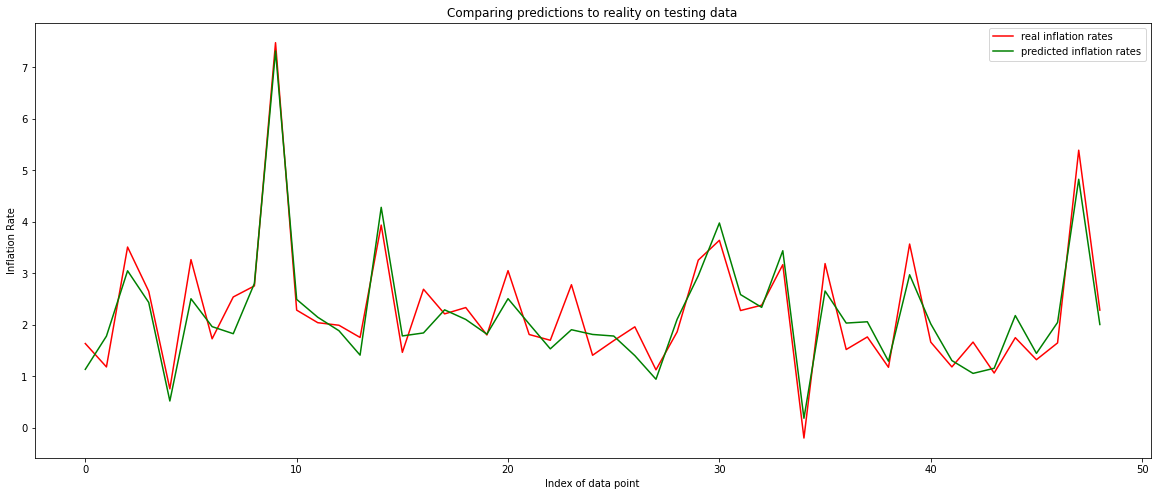

In [22]:
# graphing the real inflation rates and the prediction results
real_inflation = list(y_test)
l = len(real_inflation)
x = range(l)
plt.plot(x, real_inflation, color='r', label='real inflation rates')
plt.plot(x, predictions, color='g', label='predicted inflation rates')
plt.xlabel('Index of data point')
plt.ylabel('Inflation Rate')
plt.title('Comparing predictions to reality on testing data')
plt.legend()
plt.show()

Since we found that these values are correlated with the interest rate let's see if we can use past values to predict future inflation rates.

In [23]:
# first we will add a new column where for each row it contains the inflation rate in the next month
future_inflation = [row['INFLATION(%)'] for index, row in df.iterrows()]
# dropping the first vlue
future_inflation.pop(0)
# dropping last row from data frame
df.drop(df.tail(1).index,inplace=True)
df['FutureInflation'] = future_inflation
df.head()

DATE  UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
0  01-05-2022        3.6                106.4         352.857   123.322800   
1  01-04-2022        3.6                107.3         343.730   121.978170   
2  01-03-2022        3.6                107.2         345.852   121.301004   
3  01-02-2022        3.8                110.5         343.583   119.702806   
4  01-01-2022        4.0                113.8         345.742   118.619339   

   INFLATION(%)  MORTGAGE INT. MONTHLY AVG(%)  MED HOUSEHOLD INCOME  \
0      8.581511                        5.2300                   NaN   
1      8.258629                        4.9825                   NaN   
2      8.542456                        4.1720                   NaN   
3      7.871064                        3.7625                   NaN   
4      7.479872                        3.4450                   NaN   

   CORP. BOND YIELD(%)  MONTHLY HOME SUPPLY  % SHARE OF WORKING POPULATION  \
0                 4.13                  8.4                            NaN   
1                 3.76                  8.4                            NaN   
2                 3.43                  7.0                            NaN   
3                 3.25                  6.0                            NaN   
4                 2.93                  5.7                            NaN   

   GDP PER CAPITA  QUARTERLY REAL GDP  QUARTERLY GDP GROWTH RATE (%)  \
0           74737           19699.465                      -0.144227   
1           74737           19699.465                      -0.144227   
2           73289           19727.918                      -0.395692   
3           73289           19727.918                      -0.395692   
4           73289           19727.918                      -0.395692   

   CSUSHPISA  FutureInflation  
0    120.724         8.258629  
1    121.813         8.542456  
2    122.888         7.871064  
3    123.831         7.479872  
4    124.780         7.036403

Lets build the model.

In [24]:
X = df[['UNRATE(%)', 'MORTGAGE INT. MONTHLY AVG(%)', 'MONTHLY HOME SUPPLY', 'GDP PER CAPITA', 'CONSUMER CONF INDEX']]
y = df['FutureInflation']

from sklearn.model_selection import train_test_split
# we will split the data intro training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# we will use a random forest regressor model for this problem
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=1)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# we will use the Mean Absolute Error metric to measure accuracy
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))

0.34876464363479137


Our model can predict what the inflation rate will be next month with an error margin of 0.34%. That sounds good.

Lets plot the results

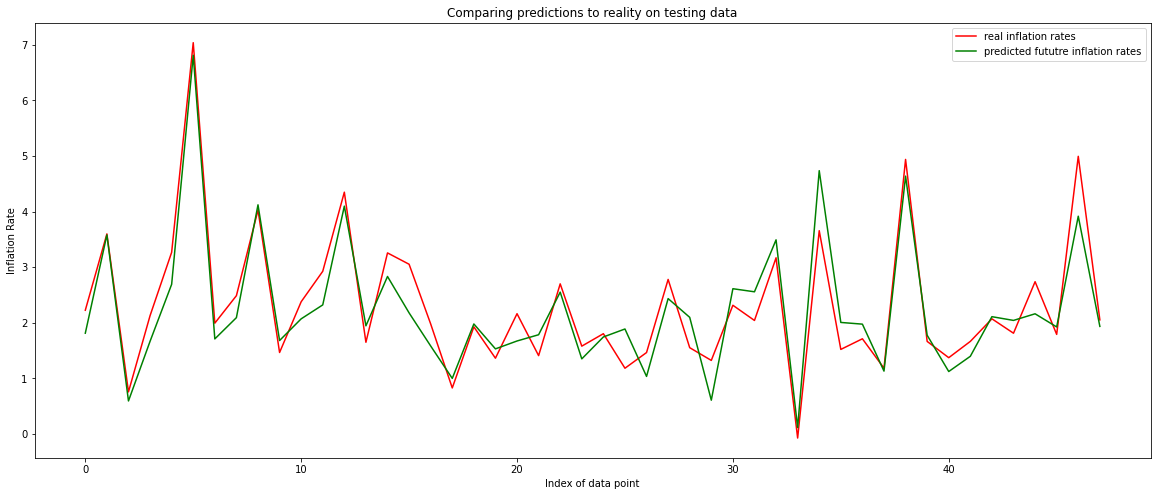

In [25]:
real_inflation = list(y_test)
l = len(real_inflation)
x = range(l)
plt.plot(x, real_inflation, color='r', label='real inflation rates')
plt.plot(x, predictions, color='g', label='predicted fututre inflation rates')
plt.xlabel('Index of data point')
plt.ylabel('Inflation Rate')
plt.title('Comparing predictions to reality on testing data')
plt.legend()
plt.show()

The prediction accuracy is at it's highest when we encounter high volatility in the inflation rate, similar to what we saw in our previous model.